**Mean**, **Median**,**Mode**

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import statistics

In [ ]:
#mean,median,mode
df=sns.load_dataset('tips')

In [ ]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [ ]:
np.mean(df['total_bill'])

19.785942622950824

In [ ]:
np.median(df['total_bill'])

17.795

In [ ]:
statistics.mode(df['total_bill'])

13.42

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


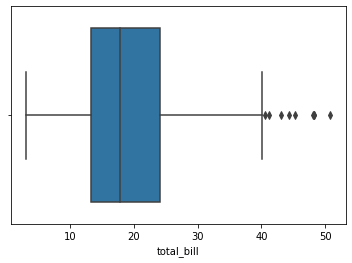

In [ ]:
sns.boxplot(df['total_bill'])

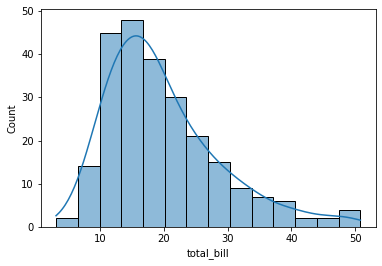

In [ ]:
sns.histplot(df['total_bill'],kde=True)

In [ ]:
df1=sns.load_dataset('iris')

In [ ]:
df1.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

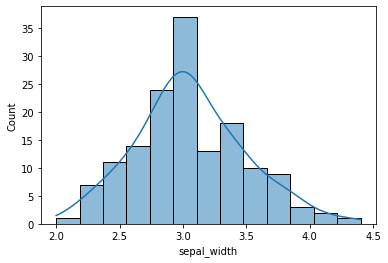

In [ ]:
sns.histplot(df1['sepal_width'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


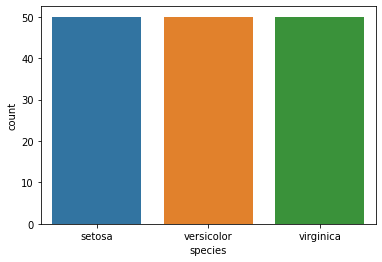

In [ ]:
sns.countplot(df1['species'])

In [ ]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

**Outliers**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##Define our dataset
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <a list of 10 Patch objects>)

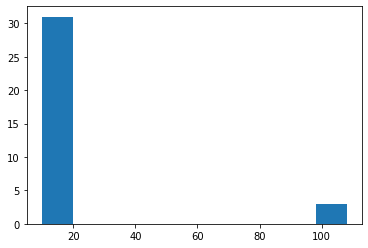

In [ ]:
plt.hist(dataset)

In [ ]:
## Z_score
outliers=[]

def detect_outliers(dataset):
  threshold=3 ##3 std dviation
  mean=np.mean(dataset)
  std=np.std(dataset)

  for i in dataset:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers


In [ ]:
detect_outliers(dataset)

[102, 107, 108]

#IQR
1. Sort the dataset
2. Calculate Q1 and Q3
3. IQR(Q3-Q1)
4. Find the Lower fence(q1-1.5(iqr))
5. Find the upper fence(q3+1.5(iqr))

In [ ]:
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [ ]:
q1,q3=np.percentile(dataset,[25,75])

In [ ]:
print(q1,q3)

12.0 15.0


In [ ]:
iqr=q3-q1
iqr

3.0

In [ ]:
## Find the lower fence and higher fence
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [ ]:
lower_fence,higher_fence

(7.5, 19.5)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


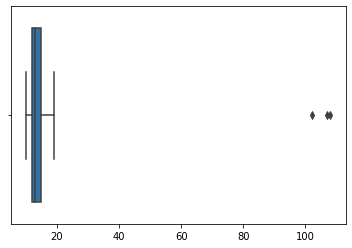

In [ ]:
sns.boxplot(dataset)

In [ ]:
data=[]
for i in dataset:
  if (i>=7.5 and i<=19.5):
    data.append(i)

In [ ]:
data

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


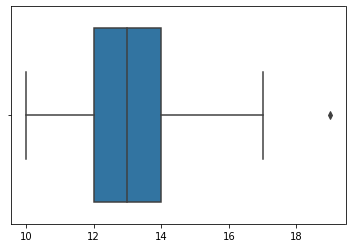

In [ ]:
sns.boxplot(data)

**Z**-**test**

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
#enter IQ Levels for 20 patients
data=[88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]
ztest(data,value=100)

(1.5976240527147705, 0.1101266701438426)

In [ ]:
## t-test
ages=[10,25,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [ ]:
import numpy as np
ages_mean=np.mean(ages)
ages_mean

30.5

In [ ]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [ ]:
age_sample

array([18, 32, 43, 18, 35, 28, 26, 18, 28, 18])

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest_1samp(age_sample,30)

Ttest_1sampResult(statistic=-1.3210082651614172, pvalue=0.21909775516397687)

In [ ]:
ttest_1samp(age_sample,28)

Ttest_1sampResult(statistic=-0.5871147845161857, pvalue=0.5715590123072278)

In [ ]:
ttest_1samp(age_sample,26)

Ttest_1sampResult(statistic=0.14677869612904576, pvalue=0.8865419941185856)

In [ ]:
# consider another example
# ages of the college students(population)
# 1 class student mean of all the ages

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [ ]:
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [ ]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [ ]:
classA_ages.mean()

46.9

In [ ]:
_,p_value=ttest_1samp(classA_ages,popmean=school_ages.mean())

In [ ]:
school_ages.mean()

53.303333333333335

In [ ]:
if p_value<0.05:
  print("Accept H0")
else:
  print("Reject H0")

Accept H0


In [ ]:
import seaborn as sns
df=sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

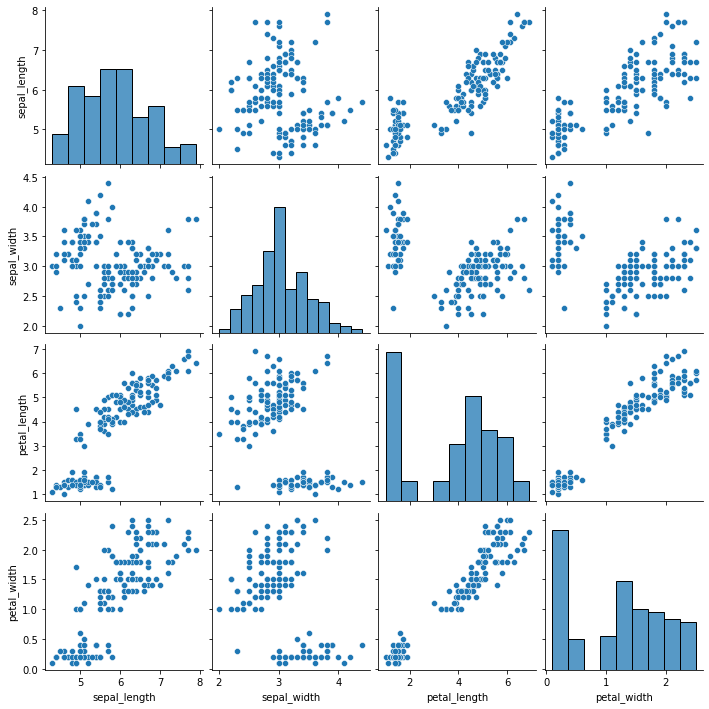

In [ ]:
sns.pairplot(df )